In [1]:
from pathlib import Path
from zipfile import ZipFile
import fiona.drvsupport
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.ops import nearest_points 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LassoCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# x,y_train
gdf_grid_x = gpd.read_file('/root/workdir/data/RTM/gdf/gdf_grid_500_2011_13.geojson')
gdf_grid_y = gpd.read_file('/root/workdir/data/RTM/gdf/gdf_grid_500.geojson')
# x_test
gdf_grid_x_test = gpd.read_file('/root/workdir/data/RTM/gdf/gdf_grid_500_2014_test.geojson')

In [3]:
gdf_grid_x_test.columns

Index(['centroid_x', 'centroid_y', 'crime_cnt_2010', 'crime_cnt_2011',
       'crime_cnt_2012', 'crime_cnt_2013', 'crime_cnt_2014', 'crime_cnt_2015',
       'crime_cnt_2016', 'crime_cnt_2017', 'crime_cnt_2018', 'crime_cnt_2019',
       'crime_cnt_2020', 'crime_cnt_2021', 'crime_cnt_2022', 'crime_cnt_2023',
       'Alley_271_DST', 'Alley_519_DST', 'Alley_779_DST', 'Alley_999_DST',
       'Alley_271_KDE', 'Alley_519_KDE', 'Alley_779_KDE', 'Alley_999_KDE',
       'Foreclosure_271_DST', 'Foreclosure_519_DST', 'Foreclosure_779_DST',
       'Foreclosure_999_DST', 'Foreclosure_271_KDE', 'Foreclosure_519_KDE',
       'Foreclosure_779_KDE', 'Foreclosure_999_KDE', 'Graffiti_271_DST',
       'Graffiti_519_DST', 'Graffiti_779_DST', 'Graffiti_999_DST',
       'Graffiti_271_KDE', 'Graffiti_519_KDE', 'Graffiti_779_KDE',
       'Graffiti_999_KDE', 'Sanitation_271_DST', 'Sanitation_519_DST',
       'Sanitation_779_DST', 'Sanitation_999_DST', 'Sanitation_271_KDE',
       'Sanitation_519_KDE', 'Sanitatio

In [4]:
gdf_grid_x.columns

Index(['centroid_x', 'centroid_y', 'crime_cnt_2010', 'crime_cnt_2011',
       'crime_cnt_2012', 'crime_cnt_2013', 'crime_cnt_2014', 'crime_cnt_2015',
       'crime_cnt_2016', 'crime_cnt_2017', 'crime_cnt_2018', 'crime_cnt_2019',
       'crime_cnt_2020', 'crime_cnt_2021', 'crime_cnt_2022', 'crime_cnt_2023',
       'Alley_271_DST', 'Alley_519_DST', 'Alley_779_DST', 'Alley_999_DST',
       'Alley_271_KDE', 'Alley_519_KDE', 'Alley_779_KDE', 'Alley_999_KDE',
       'Foreclosure_271_DST', 'Foreclosure_519_DST', 'Foreclosure_779_DST',
       'Foreclosure_999_DST', 'Foreclosure_271_KDE', 'Foreclosure_519_KDE',
       'Foreclosure_779_KDE', 'Foreclosure_999_KDE', 'Graffiti_271_DST',
       'Graffiti_519_DST', 'Graffiti_779_DST', 'Graffiti_999_DST',
       'Graffiti_271_KDE', 'Graffiti_519_KDE', 'Graffiti_779_KDE',
       'Graffiti_999_KDE', 'Sanitation_271_DST', 'Sanitation_519_DST',
       'Sanitation_779_DST', 'Sanitation_999_DST', 'Sanitation_271_KDE',
       'Sanitation_519_KDE', 'Sanitatio

In [5]:
gdf_grid_y.columns

Index(['centroid_x', 'centroid_y', 'crime_cnt_2010', 'crime_cnt_2011',
       'crime_cnt_2012', 'crime_cnt_2013', 'crime_cnt_2014', 'crime_cnt_2015',
       'crime_cnt_2016', 'crime_cnt_2017', 'crime_cnt_2018', 'crime_cnt_2019',
       'crime_cnt_2020', 'crime_cnt_2021', 'crime_cnt_2022', 'crime_cnt_2023',
       'geometry'],
      dtype='object')

In [6]:
gdf_grid_y['crime_cnt_2011_13'] = gdf_grid_y['crime_cnt_2011'] + gdf_grid_y['crime_cnt_2012'] + gdf_grid_y['crime_cnt_2013']

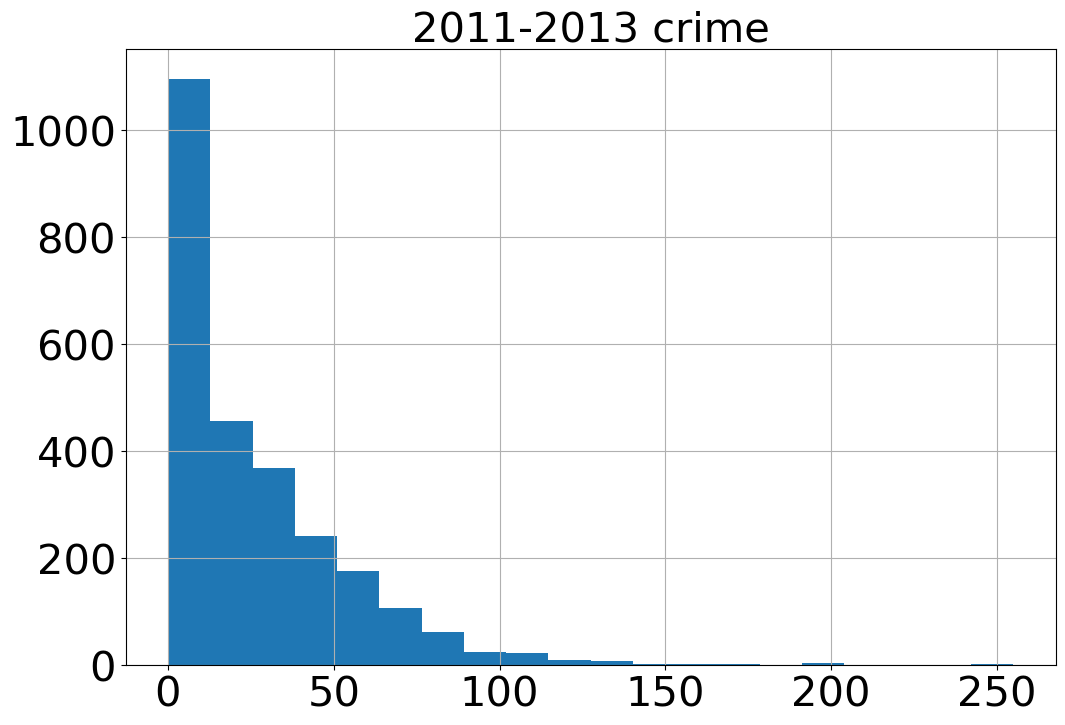

In [7]:
# ヒストグラムを描画
ax = gdf_grid_y[['crime_cnt_2011_13']].hist(bins=20, figsize=(12, 8))

# y軸の目盛の大きさを変更
plt.yticks(fontsize=30)  
plt.xticks(fontsize=30)  
plt.title(label='2011-2013 crime',fontsize=30)
# グラフを表示
plt.show()

array([[<Axes: title={'center': 'crime_cnt_2011_13'}>]], dtype=object)

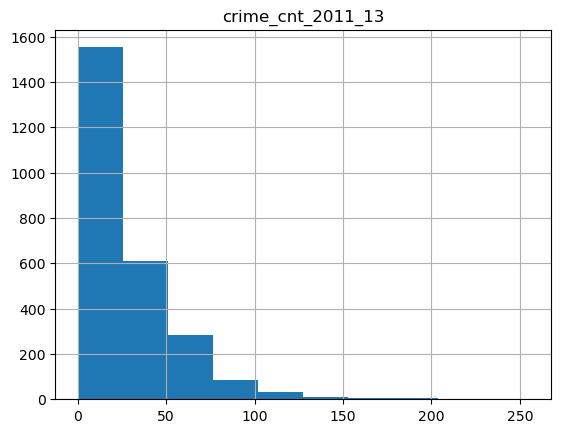

In [8]:
gdf_grid_y[['crime_cnt_2011_13']].hist()

<Axes: >

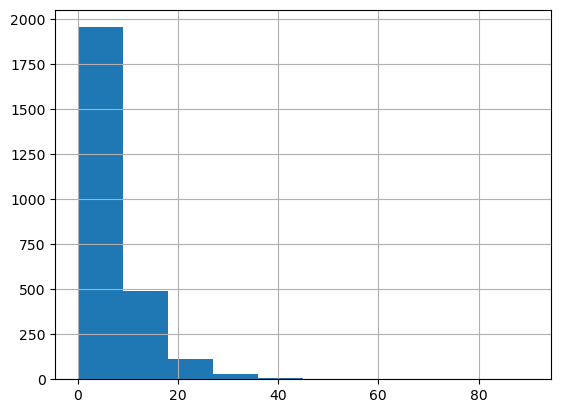

In [9]:
gdf_grid_x_test['crime_cnt_2014'].hist()

# yeo-johnson変換で正規分布に近づける

In [10]:
# 2Darrayに変換
data = np.array(gdf_grid_y[['crime_cnt_2011_13']]).reshape(-1,1)
# 変換
pt = PowerTransformer()
pt.fit(data)
gdf_grid_y[['crime_cnt_2011_13_bc']] = pt.transform(data)

In [11]:
# 2Darrayに変換
data = np.array(gdf_grid_x_test['crime_cnt_2014']).reshape(-1,1)
# 変換
pt = PowerTransformer()
pt.fit(data)
gdf_grid_x_test[['crime_cnt_2014_bc']] = pt.transform(data)

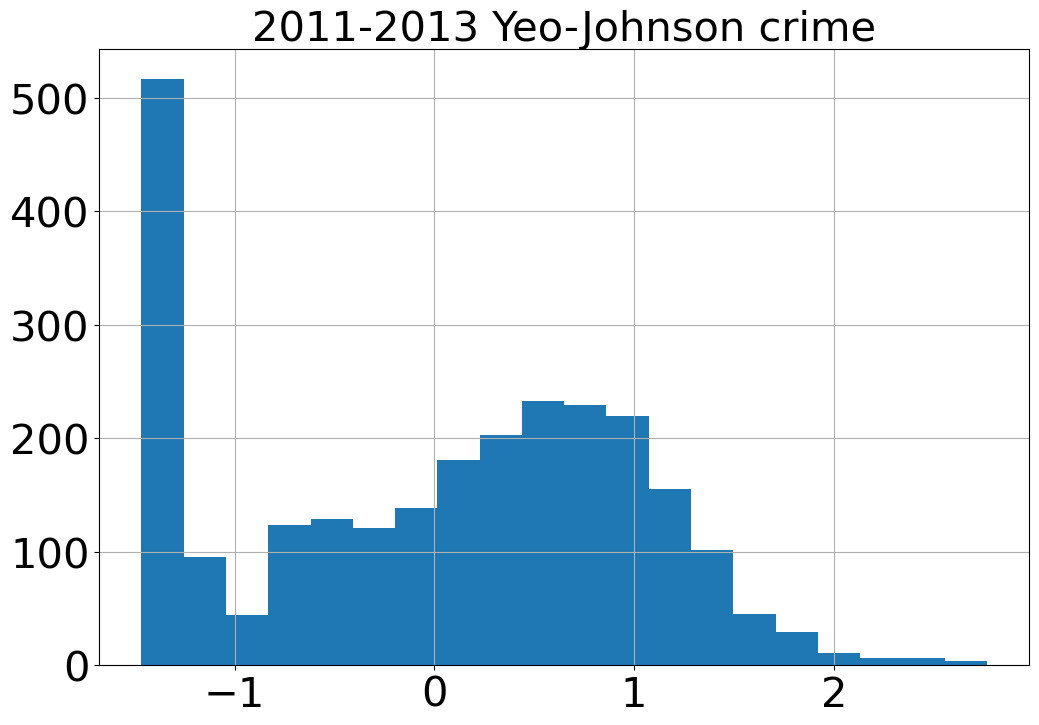

In [12]:
# ヒストグラムを描画
ax = gdf_grid_y[['crime_cnt_2011_13_bc']].hist(bins=20, figsize=(12, 8))

# y軸の目盛の大きさを変更
plt.yticks(fontsize=30)  
plt.xticks(fontsize=30)  
plt.title(label='2011-2013 Yeo-Johnson crime',fontsize=30)
# グラフを表示
plt.show()

array([[<Axes: title={'center': 'crime_cnt_2014_bc'}>]], dtype=object)

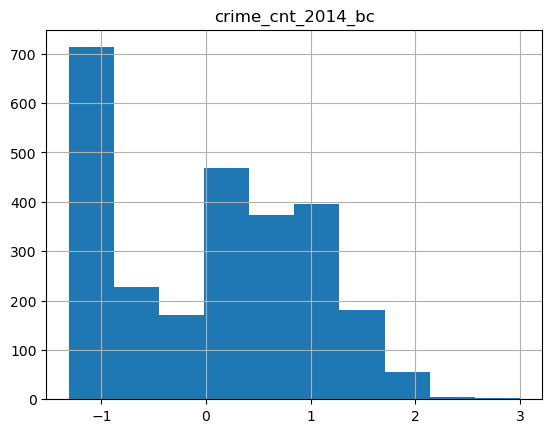

In [12]:
gdf_grid_x_test[['crime_cnt_2014_bc']].hist()

# LassoCVで適切なαを探索

In [13]:
feature_name_list = list(gdf_grid_x_test.columns[16:-2])

In [14]:
# データ準備
X_train = gdf_grid_x[feature_name_list]
y_train = gdf_grid_y['crime_cnt_2011_13_bc']
X_test = gdf_grid_x_test[feature_name_list]
y_test = gdf_grid_x_test['crime_cnt_2014_bc']

In [15]:
# CVの実行
lasso = LassoCV(cv=20, random_state=0).fit(X_train, y_train)

In [16]:
lasso.alpha_

0.0009671737406425796

In [17]:
lasso.feature_names_in_

array(['Alley_271_DST', 'Alley_519_DST', 'Alley_779_DST', 'Alley_999_DST',
       'Alley_271_KDE', 'Alley_519_KDE', 'Alley_779_KDE', 'Alley_999_KDE',
       'Foreclosure_271_DST', 'Foreclosure_519_DST',
       'Foreclosure_779_DST', 'Foreclosure_999_DST',
       'Foreclosure_271_KDE', 'Foreclosure_519_KDE',
       'Foreclosure_779_KDE', 'Foreclosure_999_KDE', 'Graffiti_271_DST',
       'Graffiti_519_DST', 'Graffiti_779_DST', 'Graffiti_999_DST',
       'Graffiti_271_KDE', 'Graffiti_519_KDE', 'Graffiti_779_KDE',
       'Graffiti_999_KDE', 'Sanitation_271_DST', 'Sanitation_519_DST',
       'Sanitation_779_DST', 'Sanitation_999_DST', 'Sanitation_271_KDE',
       'Sanitation_519_KDE', 'Sanitation_779_KDE', 'Sanitation_999_KDE',
       'School_271_DST', 'School_519_DST', 'School_779_DST',
       'School_999_DST', 'School_271_KDE', 'School_519_KDE',
       'School_779_KDE', 'School_999_KDE', 'SLO_271_DST', 'SLO_519_DST',
       'SLO_779_DST', 'SLO_999_DST', 'SLO_271_KDE', 'SLO_519_KDE',
     

In [18]:
lasso.coef_

array([ 0.3360575 , -0.02816586, -0.02471064, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.40302921, -0.05388897,
       -0.02746284, -0.        ,  0.15586992,  0.        ,  0.        ,
        0.        ,  0.17186727, -0.        , -0.        , -0.        ,
       -0.        , -0.06005682,  0.02466861, -0.        ,  0.30533587,
       -0.08532088, -0.        , -0.        ,  0.19026876,  0.        ,
        0.        ,  0.        ,  0.13320795,  0.24738412,  0.15482057,
        0.06296394,  0.03837625, -0.        ,  0.        ,  0.        ,
       -0.13937669, -0.        , -0.        , -0.        ,  0.10492045,
        0.        ,  0.        ,  0.        ,  0.53271455,  0.00817948,
       -0.05878811, -0.        ,  0.36625097,  0.        ,  0.00646592,
        0.18854049,  0.21502395, -0.0254655 , -0.        , -0.        ,
        0.21573051,  0.38213188,  0.        ,  0.        ])

In [19]:
gdf_grid_x_test['crime_pred'] = lasso.predict(X_test)

array([[<Axes: title={'center': 'crime_pred'}>]], dtype=object)

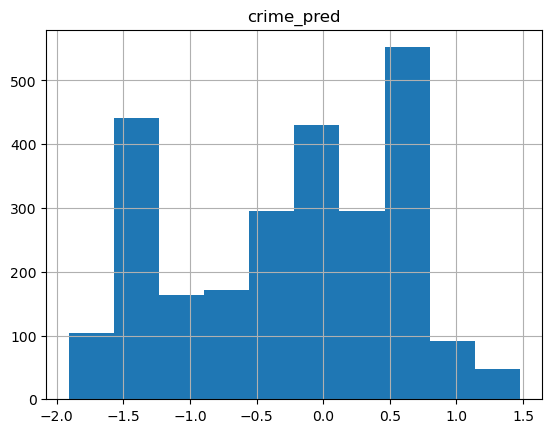

In [20]:
gdf_grid_x_test[['crime_pred']].hist()

# confusion matrix

### 精度を図示
### train,testsplitは別の年代で

In [21]:
# 閾値を計算
y_true = y_test
y_pred = gdf_grid_x_test['crime_pred']
y_true_std = np.std(y_true)
y_true_mean = np.mean(y_true)
y_pred_std = np.std(y_pred)
y_pred_mean = np.mean(y_pred)
# matrixを作成
y_true_bins = [-np.inf, y_true_mean, y_true_mean+y_true_std, y_true_mean+2*y_true_std, np.inf]
y_pred_bins = [-np.inf, y_pred_mean, y_pred_mean+y_pred_std, y_pred_mean+2*y_pred_std, np.inf]
names = ['<mean', 'mean to 1SD', '1SD to 2SD', '+2SD to max']

gdf_grid_x_test['crime_cnt_bc_ctg'] = pd.cut(y_true, y_true_bins, labels=names)
gdf_grid_x_test['crime_pred_ctg'] = pd.cut(y_pred, y_pred_bins, labels=names)

<Axes: >

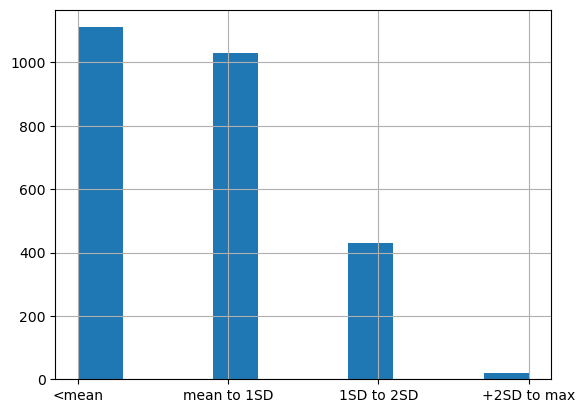

In [22]:
gdf_grid_x_test['crime_cnt_bc_ctg'].hist()

<Axes: >

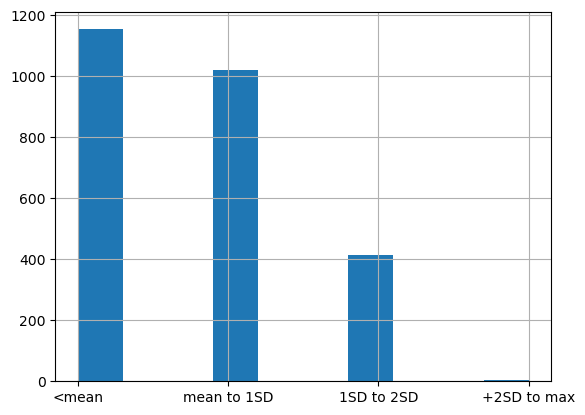

In [23]:
gdf_grid_x_test['crime_pred_ctg'].hist()

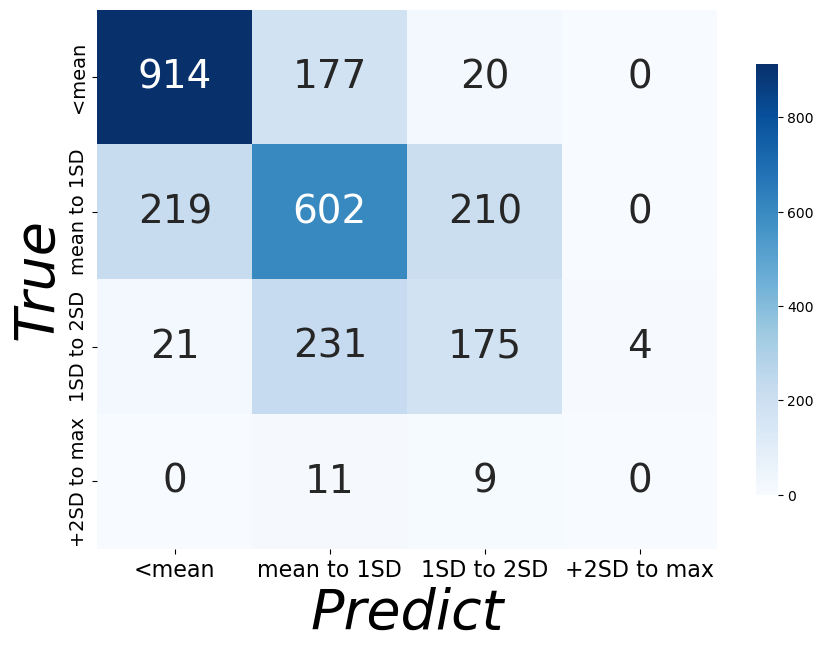

In [101]:
# confusion matrixを描画するための関数
y_true=gdf_grid_x_test['crime_cnt_bc_ctg']
y_pred=gdf_grid_x_test['crime_pred_ctg']
names = ['<mean', 'mean to 1SD', '1SD to 2SD', '+2SD to max']


cmx_data = confusion_matrix(y_true, y_pred, labels=names)
df_cmx = pd.DataFrame(cmx_data, index=names, columns=names)

plt.figure(figsize = (10,7))
sns.heatmap(df_cmx, annot=True, cmap='Blues', fmt='d' ,cbar_kws={"shrink": 0.8},
            annot_kws={"size": 28}) 
# ラベルのフォントサイズを変更
plt.xticks(fontsize=16)  # x軸ラベルのフォントサイズ
plt.yticks(fontsize=14)  # y軸ラベルのフォントサイズ
plt.xlabel(xlabel='Predict', fontsize=40, fontstyle='italic')
plt.ylabel(ylabel='True', fontsize=40, fontstyle='italic')
plt.show()

In [25]:
df_cmx

,<mean,mean to 1SD,1SD to 2SD,+2SD to max
<mean,914,177,20,0
mean to 1SD,219,602,210,0
1SD to 2SD,21,231,175,4
+2SD to max,0,11,9,0


In [54]:
gdf = gpd.read_file('/root/workdir/data/RTM/gdf/gdf_BURGLARY_2013.geojson')

In [118]:
len(gdf)

17885

In [64]:
gdf1 = gpd.read_file('/root/workdir/data/RTM/gdf/gdf_BURGLARY_2014.geojson')

In [119]:
len(gdf1)

14560

In [56]:
gdf_chicago = gpd.read_file('/root/workdir/data/RTM/gdf/chicago.geojson').to_crs(epsg=26971)

<Axes: >

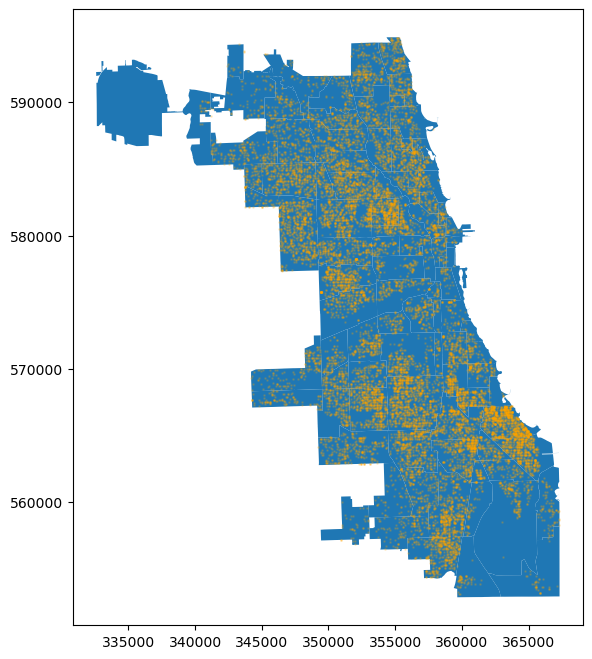

In [71]:
ax = gdf_chicago.plot(figsize=(10,8))
gdf.plot(ax=ax,markersize=0.8, alpha=0.2, color='orange')

,2011,2012,2013,2014


In [126]:
gdf_feature_list = ['BURGLARY', 'Alley', 'Foreclosure', 'Graffiti', 'Sanitation', 'SCHOOL', 'SLO', 'VAB', 'Vehicles']
# gdf_feature_list = ['BURGLARY', 'Alley']
df_2011_2014 = pd.DataFrame(columns=[2011, 2012, 2013, 2014], index=gdf_feature_list)
df_2011_2014.loc['Alley', 2011]=1
df_2011_2014

,2011,2012,2013,2014
BURGLARY,NaN,NaN,NaN,NaN
Alley,1,NaN,NaN,NaN
Foreclosure,NaN,NaN,NaN,NaN
Graffiti,NaN,NaN,NaN,NaN
Sanitation,NaN,NaN,NaN,NaN
SCHOOL,NaN,NaN,NaN,NaN
SLO,NaN,NaN,NaN,NaN
VAB,NaN,NaN,NaN,NaN
Vehicles,NaN,NaN,NaN,NaN


In [123]:
for feature in gdf_feature_list:
    for year in range(2011,2015):
        gdf = gpd.read_file(f'/root/workdir/data/RTM/gdf/gdf_{feature}_{year}.geojson')
        df_2011_2014.loc[feature, year]=len(gdf)



/tmp/ipykernel_2094/2964243617.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_2011_2014.loc[feature][year]=len(gdf)


In [124]:
df_2011_2014

,2011,2012,2013,2014
BURGLARY,26615,22832,17885,14560
Alley,46844,20025,15221,21762
Foreclosure,16680,16120,11131,7511
Graffiti,136948,109931,137079,124742
Sanitation,17920,19122,18092,19042
SCHOOL,674,681,672,680
SLO,34059,31033,22748,65155
VAB,15380,11976,8366,5450
Vehicles,19933,17411,16091,20385
